In [547]:
# ECGR 4105
# Angelica Chica
# ID: 800 929 546
# Homework 1

In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('Housing.csv')
df.head()
m = len(df)
m


545

In [549]:
# Compute gradient descent model parameters and cost for linear regresision
def compute_cost(X,y,theta):
     predictions = X.dot(theta)
     errors = np.subtract(predictions, y)
     sqrErrors = np.square(errors)
     J = 1 / (2 * m) * np.sum(sqrErrors)
     return J
    
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Defining the map function to map strings to numbers in the table
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Problem 1-a 

In [550]:
# List of variables to map 
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
           'prefarea']

# Applying the function to the housing List 
df[varlist] = df[varlist].apply(binary_map)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [551]:
# Split the data into training and test sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 10)
df_train.shape

(381, 13)

In [552]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.0000000001;

m = len(df_train)

# Training Set, x1 = area, x2 = bedrooms, x3 = stories, x10 = parking
price = df_train.values[:, 0] # X0
area = df_train.values[:, 1] # X1
bed = df_train.values[:, 2] # X2
bath = df_train.values[:, 3] # X3
sto = df_train.values[:, 4] # X4
park = df_train.values[:, 10] # X10

# Format training set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# Get theta and train cost
theta, cost_history_train = gradient_descent(X, Y, theta, alpha, iterations)

In [553]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.0000000001;

m = len(df_test)

# test set
price = df_test.values[:, 0]
area = df_test.values[:, 1]
bed = df_test.values[:, 2]
bath = df_test.values[:, 3]
sto = df_test.values[:, 4]
park = df_test.values[:, 10]

# Format test set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)


X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# get theta and test cost
theta, cost_history_test = gradient_descent(X, Y, theta, alpha, iterations)

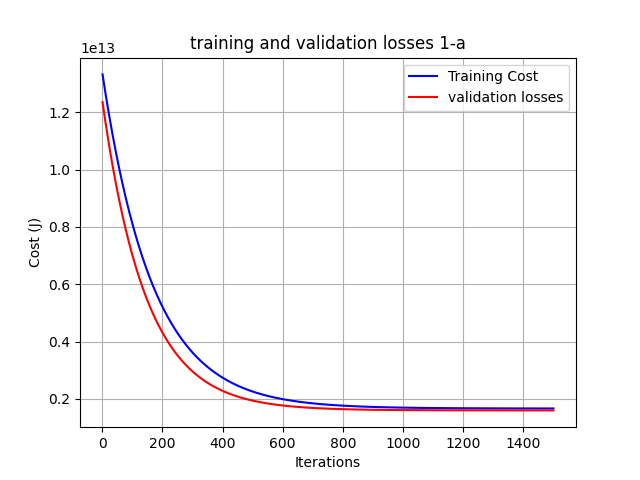

In [554]:
plt.plot(range(1, iterations + 1),cost_history_train, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_test, color='red', label = "validation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('training and validation losses 1-a')
plt.show()

# Problem 1-b

In [555]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.0000000001;

m = len(df_train)

# training set
price = df_train.values[:, 0]
area = df_train.values[:, 1]
bed = df_train.values[:, 2]
bath = df_train.values[:, 3]
sto = df_train.values[:, 4]
main = df_train.values[:, 5]
guest = df_train.values[:, 6]
base = df_train.values[:, 7]
hotwa = df_train.values[:, 8]
ac = df_train.values[:, 9]
park = df_train.values[:, 10]
pref = df_train.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_train = gradient_descent(X, Y, theta, alpha, iterations)

In [556]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.0000000001;

m = len(df_test)

# Test set
price = df_test.values[:, 0]
area = df_test.values[:, 1]
bed = df_test.values[:, 2]
bath = df_test.values[:, 3]
sto = df_test.values[:, 4]
main = df_test.values[:, 5]
guest = df_test.values[:, 6]
base = df_test.values[:, 7]
hotwa = df_test.values[:, 8]
ac = df_test.values[:, 9]
park = df_test.values[:, 10]
pref = df_test.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_test = gradient_descent(X, Y, theta, alpha, iterations)

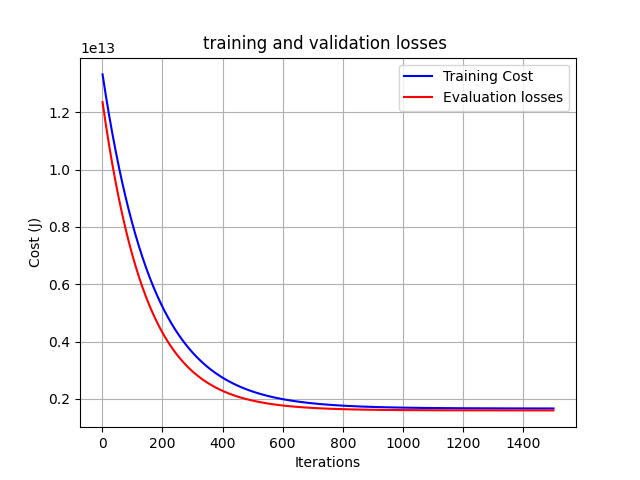

In [557]:
plt.plot(range(1, iterations + 1),cost_history_train, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_test, color='red', label = "Evaluation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('training and validation losses ')
plt.show()

# Problem 2a

In [558]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
175,9800,4,2,2,2,5250000
25,6540,4,2,2,2,8540000
253,3520,2,1,2,0,4515000
257,8250,3,1,1,0,4480000
431,3180,4,1,2,0,3290000


In [559]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

normScaler = MinMaxScaler()
Scaler = StandardScaler()

# Normalization

np.random.seed(0)
df_Ntrain, df_Ntest = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 10)
df_Ntest.shape

df_Ntrain[num_vars] = normScaler.fit_transform(df_Ntrain[num_vars])
df_Ntest[num_vars] = normScaler.fit_transform(df_Ntest[num_vars])

In [560]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;

m = len(df_Ntrain)

# Training Set, x1 = area, x2 = bedrooms, x3 = stories, x10 = parking
price = df_Ntrain.values[:, 0] # X0
area = df_Ntrain.values[:, 1] # X1
bed = df_Ntrain.values[:, 2] # X2
bath = df_Ntrain.values[:, 3] # X3
sto = df_Ntrain.values[:, 4] # X4
park = df_Ntrain.values[:, 10] # X10

# Format training set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# Get theta and train cost
theta, cost_history_Ntrain = gradient_descent(X, Y, theta, alpha, iterations)

In [561]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;

m = len(df_Ntest)

# test set
price = df_Ntest.values[:, 0]
area = df_Ntest.values[:, 1]
bed = df_Ntest.values[:, 2]
bath = df_Ntest.values[:, 3]
sto = df_Ntest.values[:, 4]
park = df_Ntest.values[:, 10]

# Format test set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)


X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# get theta and test cost
theta, cost_history_Ntest = gradient_descent(X, Y, theta, alpha, iterations)

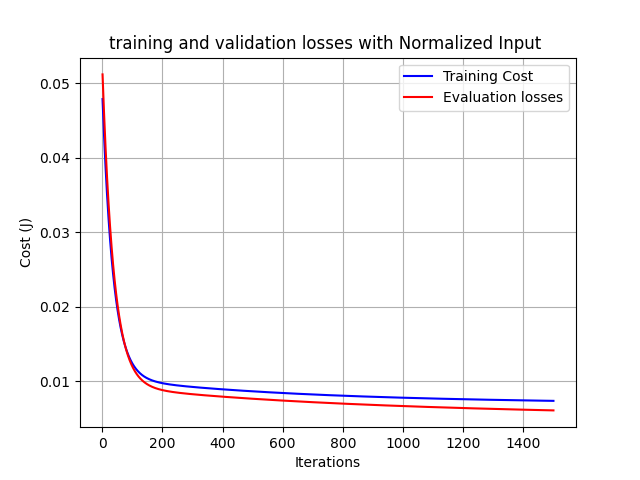

In [562]:
plt.plot(range(1, iterations + 1),cost_history_Ntrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_Ntest, color='red', label = "Evaluation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('training and validation losses with Normalized Input ')
plt.show()

In [563]:
# Standarization

np.random.seed(0)
df_StdTrain, df_StdTest = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 10)
df_StdTest.shape

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df_StdTrain[num_vars] = Scaler.fit_transform(df_StdTrain[num_vars])
df_StdTest[num_vars] = Scaler.fit_transform(df_StdTest[num_vars])

In [564]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;

m = len(df_StdTrain)

# Training Set, x1 = area, x2 = bedrooms, x3 = stories, x10 = parking
price = df_StdTrain.values[:, 0] # X0
area = df_StdTrain.values[:, 1] # X1
bed = df_StdTrain.values[:, 2] # X2
bath = df_StdTrain.values[:, 3] # X3
sto = df_StdTrain.values[:, 4] # X4
park = df_StdTrain.values[:, 10] # X10

# Format training set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# Get theta and train cost
theta, cost_history_StdTrain = gradient_descent(X, Y, theta, alpha, iterations)

In [565]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;

m = len(df_StdTest)

# test set
price = df_StdTest.values[:, 0]
area = df_StdTest.values[:, 1]
bed = df_StdTest.values[:, 2]
bath = df_StdTest.values[:, 3]
sto = df_StdTest.values[:, 4]
park = df_StdTest.values[:, 10]

# Format test set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)


X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# get theta and test cost
theta, cost_history_StdTest = gradient_descent(X, Y, theta, alpha, iterations)

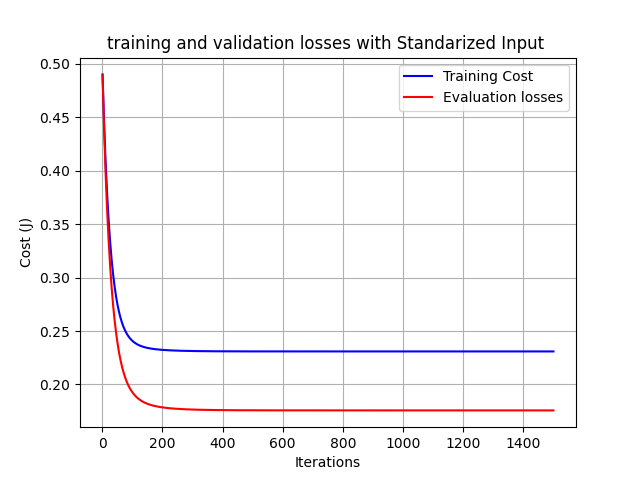

In [566]:
plt.plot(range(1, iterations + 1),cost_history_StdTrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_StdTest, color='red', label = "Evaluation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('training and validation losses with Standarized Input ')
plt.show()

# Problem 2-b

In [567]:
# Normalization

theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;

m = len(df_Ntrain)

# training set
price = df_Ntrain.values[:, 0]
area = df_Ntrain.values[:, 1]
bed = df_Ntrain.values[:, 2]
bath = df_Ntrain.values[:, 3]
sto = df_Ntrain.values[:, 4]
main = df_Ntrain.values[:, 5]
guest = df_Ntrain.values[:, 6]
base = df_Ntrain.values[:, 7]
hotwa = df_Ntrain.values[:, 8]
ac = df_Ntrain.values[:, 9]
park = df_Ntrain.values[:, 10]
pref = df_Ntrain.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_Ntrain = gradient_descent(X, Y, theta, alpha, iterations)

In [568]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;

m = len(df_Ntest)

# training set
price = df_Ntest.values[:, 0]
area = df_Ntest.values[:, 1]
bed = df_Ntest.values[:, 2]
bath = df_Ntest.values[:, 3]
sto = df_Ntest.values[:, 4]
main = df_Ntest.values[:, 5]
guest = df_Ntest.values[:, 6]
base = df_Ntest.values[:, 7]
hotwa = df_Ntest.values[:, 8]
ac = df_Ntest.values[:, 9]
park = df_Ntest.values[:, 10]
pref = df_Ntest.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_Ntest = gradient_descent(X, Y, theta, alpha, iterations)

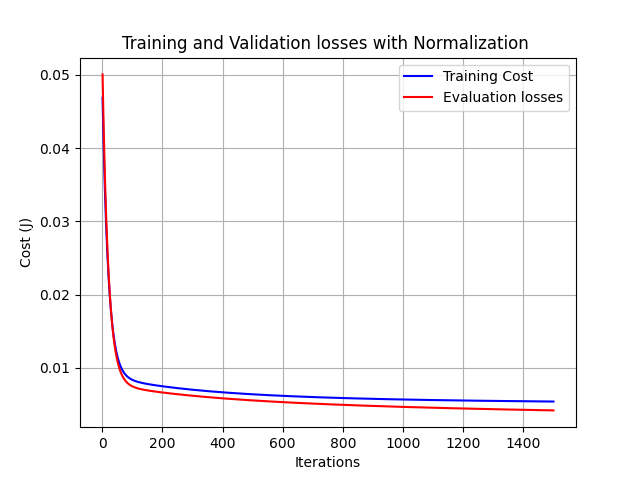

In [569]:
plt.plot(range(1, iterations + 1),cost_history_Ntrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_Ntest, color='red', label = "Evaluation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation losses with Normalization ')
plt.show()

In [570]:
# Standarization

theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;

m = len(df_StdTrain)

# training set
price = df_StdTrain.values[:, 0]
area = df_StdTrain.values[:, 1]
bed = df_StdTrain.values[:, 2]
bath = df_StdTrain.values[:, 3]
sto = df_StdTrain.values[:, 4]
main = df_StdTrain.values[:, 5]
guest = df_StdTrain.values[:, 6]
base = df_StdTrain.values[:, 7]
hotwa = df_StdTrain.values[:, 8]
ac = df_StdTrain.values[:, 9]
park = df_StdTrain.values[:, 10]
pref = df_StdTrain.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_StdTrain = gradient_descent(X, Y, theta, alpha, iterations)

In [571]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;

m = len(df_StdTest)

# training set
price = df_StdTest.values[:, 0]
area = df_StdTest.values[:, 1]
bed = df_StdTest.values[:, 2]
bath = df_StdTest.values[:, 3]
sto = df_StdTest.values[:, 4]
main = df_StdTest.values[:, 5]
guest = df_StdTest.values[:, 6]
base = df_StdTest.values[:, 7]
hotwa = df_StdTest.values[:, 8]
ac = df_StdTest.values[:, 9]
park = df_StdTest.values[:, 10]
pref = df_StdTest.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_StdTest = gradient_descent(X, Y, theta, alpha, iterations)

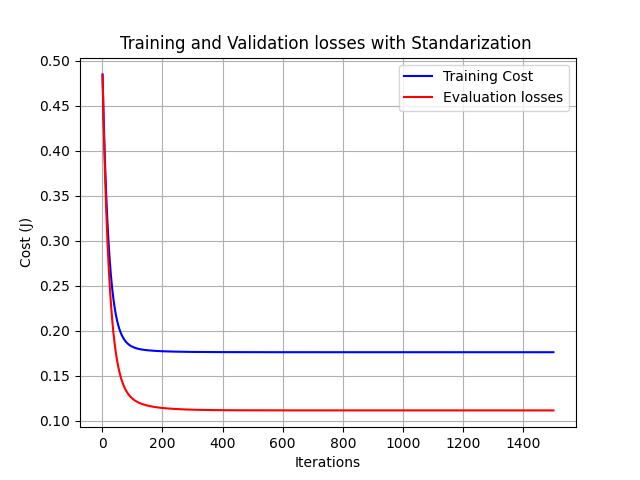

In [572]:
plt.plot(range(1, iterations + 1),cost_history_StdTrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_StdTest, color='red', label = "Evaluation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation losses with Standarization ')
plt.show()

# Problem 3-a

In [573]:
def gradient_descent_reg(X, y, theta, alpha, iterations, penalty):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = [element * (1 - ((alpha*penalty)/m)) for element in theta] - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [574]:
np.random.seed(0)
df_Ntrain, df_Ntest = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 10)
df_Ntest.shape

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

df_Ntrain[num_vars] = normScaler.fit_transform(df_Ntrain[num_vars])
df_Ntest[num_vars] = normScaler.fit_transform(df_Ntest[num_vars])



In [575]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;
penalty = 10;

m = len(df_Ntrain)

# Training Set, x1 = area, x2 = bedrooms, x3 = stories, x10 = parking
price = df_Ntrain.values[:, 0] # X0
area = df_Ntrain.values[:, 1] # X1
bed = df_Ntrain.values[:, 2] # X2
bath = df_Ntrain.values[:, 3] # X3
sto = df_Ntrain.values[:, 4] # X4
park = df_Ntrain.values[:, 10] # X10

# Format training set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# Get theta and train cost
theta, cost_history_Ntrain = gradient_descent_reg(X, Y, theta, alpha, iterations, penalty)

In [576]:
theta = np.zeros(6)
iterations = 1500;
alpha = 0.01;
penalty = 10;

m = len(df_Ntest)

# test set
price = df_Ntest.values[:, 0]
area = df_Ntest.values[:, 1]
bed = df_Ntest.values[:, 2]
bath = df_Ntest.values[:, 3]
sto = df_Ntest.values[:, 4]
park = df_Ntest.values[:, 10]

# Format test set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_park = park.reshape(m,1)


X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_park))
Y = price

# get theta and test cost
theta, cost_history_Ntest = gradient_descent_reg(X, Y, theta, alpha, iterations, penalty)

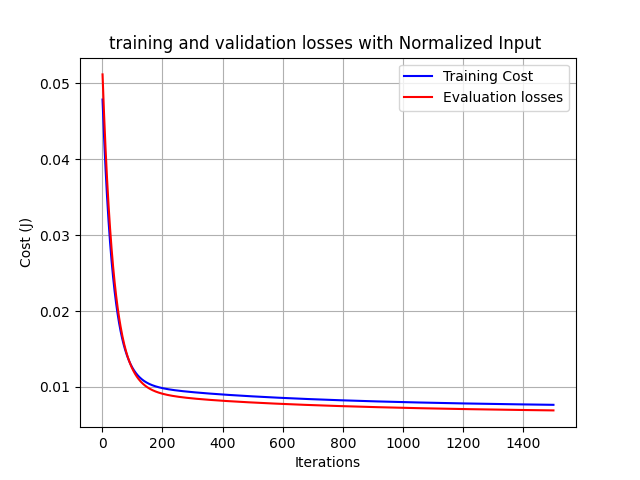

In [577]:
plt.plot(range(1, iterations + 1),cost_history_Ntrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_Ntest, color='red', label = "Evaluation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('training and validation losses with Normalized Input ')
plt.show()

# Problem 3-b

In [578]:
# Normalization

theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;
penalty = 10;

m = len(df_Ntrain)

# training set
price = df_Ntrain.values[:, 0]
area = df_Ntrain.values[:, 1]
bed = df_Ntrain.values[:, 2]
bath = df_Ntrain.values[:, 3]
sto = df_Ntrain.values[:, 4]
main = df_Ntrain.values[:, 5]
guest = df_Ntrain.values[:, 6]
base = df_Ntrain.values[:, 7]
hotwa = df_Ntrain.values[:, 8]
ac = df_Ntrain.values[:, 9]
park = df_Ntrain.values[:, 10]
pref = df_Ntrain.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_Ntrain = gradient_descent_reg(X, Y, theta, alpha, iterations, penalty)

In [579]:
theta = np.zeros(12)
iterations = 1500;
alpha = 0.01;
penalty = 10;

m = len(df_Ntest)

# training set
price = df_Ntest.values[:, 0]
area = df_Ntest.values[:, 1]
bed = df_Ntest.values[:, 2]
bath = df_Ntest.values[:, 3]
sto = df_Ntest.values[:, 4]
main = df_Ntest.values[:, 5]
guest = df_Ntest.values[:, 6]
base = df_Ntest.values[:, 7]
hotwa = df_Ntest.values[:, 8]
ac = df_Ntest.values[:, 9]
park = df_Ntest.values[:, 10]
pref = df_Ntest.values[:, 11]

# format Set
Xp = np.ones((m,1))
r_area = area.reshape(m,1)
r_bed = bed.reshape(m,1)
r_bath = bath.reshape(m,1)
r_sto = sto.reshape(m,1)
r_main = main.reshape(m,1)
r_guest = guest.reshape(m,1)
r_base = base.reshape(m,1)
r_hotwa = hotwa.reshape(m,1)
r_ac = ac.reshape(m,1)
r_park = park.reshape(m,1)
r_pref = pref.reshape(m,1)

X = np.hstack((Xp, r_area, r_bed, r_bath, r_sto, r_main, r_guest, r_base, r_hotwa, r_ac, r_park, r_pref))
Y = price

theta, cost_history_Ntest = gradient_descent_reg(X, Y, theta, alpha, iterations, penalty)

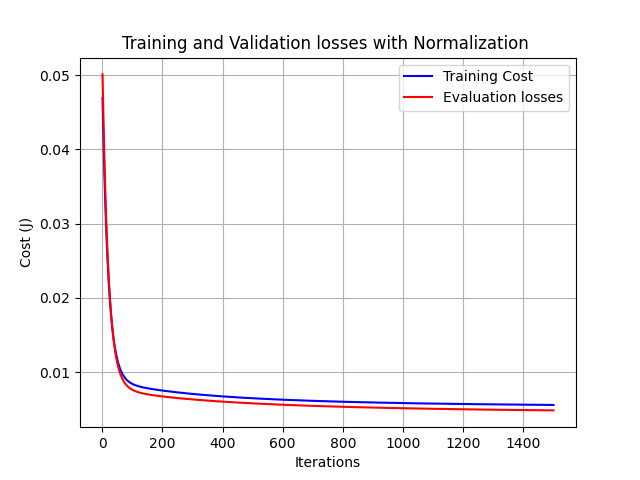

In [580]:
plt.plot(range(1, iterations + 1),cost_history_Ntrain, color='blue', label = "Training Cost")
plt.plot(range(1, iterations + 1),cost_history_Ntest, color='red', label = "Evaluation losses")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation losses with Normalization ')
plt.show()